# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv("C:/Users/wgerm/OneDrive/Documents/GitHub/Frequentist_Case_Study/1585247986_Frequentist_Case_Study/Frequentist Case Study/insurance2.csv")

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
medical.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [5]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

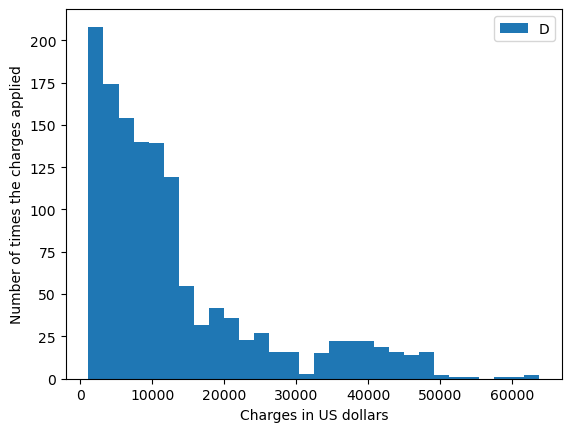

In [6]:
_= plt.hist(medical.charges, bins=30)
_= plt.xlabel('Charges in US dollars')
_= plt.ylabel('Number of times the charges applied')
_= plt.legend('Distribution the charges among the customer')


In [7]:
mean_charges = np.mean(medical.charges)
mean_charges

13270.422265141257

In [8]:
std_charges = np.std(medical.charges, ddof=1)
std_charges

12110.011236693994

In [9]:
# The histogram is very skew 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Since the data represent a random sample of charges, it can be validly considered representative of the entire population of hospital charges. It is therefore possible to infer population parameters, such as the mean.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Q3-1 Given the nature of the administrator's concern a one-sided confidence interval is most appropriate in this case. He's only want to know if the average charge has fallen below the specific amount of 12,000. 

In [10]:
 # Q3-2 Calculation of the critical value and the relevant 95% confidence intervale for the mean

In [11]:
# Q3-2.1 Size of the sample:
len_sample = len(medical.charges)
len_sample

1338

In [12]:
# Q3-2.2 Threshold 
treshold_confidence = 0.95 
alpha = 1 - treshold_confidence
alpha

0.050000000000000044

In [13]:
# Q3-2.3 Calulation of the t_value
t_value = t.ppf(alpha, df=len_sample-1)
t_value

-1.6459941145571317

In [14]:
# Q3-2.4 Calculation the margin of error
margin_of_error = t_value*(std_charges/np.sqrt(len_sample))
margin_of_error

-544.9350813250251

In [15]:
# Q3.2.5 Determination of the confidence interval
(mean_charges+margin_of_error, mean_charges-margin_of_error)

(12725.48718381623, 13815.357346466282)

# Q3-2.6 Comment on whether the administrator should be concerned.
  The administrator should not be concerned because the lower bound of the confidence interval is above the threshold of 12,000. 

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Q4-1 State the null and alternative hypothesis

Null Hypothesis (Ho) : There is no difference in the amounts charged between people with insurance and those without


Alternative Hypothesis (H1) : There is a difference in the amounts charged between people with insurance and those without

# Q4-2 What assumption about the variances of the two groups are we making here?
The variances of the charges of the people with insurance and those without are equal. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [16]:
# Q5-1 Definition of the two group

In [17]:
# Q5-1.1 People with insurance
people_charges_with_insurance = medical[medical.insuranceclaim ==1]
people_charges_with_insurance.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1
4,32,1,28.88,0,0,1,3866.8552,1
6,46,0,33.44,1,0,2,8240.5896,1
10,25,1,26.22,0,0,0,2721.3208,1


In [18]:
# Q5-1.1 People without insurance
people_charges_with_no_insurance = medical[medical.insuranceclaim ==0]
people_charges_with_no_insurance.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0


In [19]:
# Q5-2 Variances of the two groups
var_people_with_insurance = np.var(people_charges_with_insurance.charges, ddof=1)

var_people_with_no_insurance = np.var(people_charges_with_no_insurance.charges,ddof=1)

var_people_with_insurance, var_people_with_no_insurance

(197288105.14611322, 41557492.81508627)

In [20]:
# Q5-3 Sizes of the two groups
size_people_with_insurance = len(people_charges_with_insurance.charges)

size_people_with_no_insurance = len(people_charges_with_no_insurance.charges)


size_people_with_insurance, size_people_with_no_insurance

(783, 555)

In [21]:
# Q5-4 Calculation of the pooled standard deviation

In [22]:
sp = np.sqrt(((size_people_with_insurance - 1)*var_people_with_insurance + (size_people_with_no_insurance -1)*var_people_with_no_insurance)/(size_people_with_insurance + size_people_with_no_insurance - 2))
sp

11520.034268775256

In [23]:
t_value2 = (np.mean(people_charges_with_insurance.charges) - np.mean(people_charges_with_no_insurance.charges))/(sp*(np.sqrt(1/size_people_with_insurance + 1/size_people_with_no_insurance)))

t_value2

11.893299030876715

In [24]:
# Q5-5 Degree of freedom
df = size_people_with_insurance + size_people_with_no_insurance -2
df

1336

In [25]:
# Q5-6 Calculation of the p_value
p_value2 = 1 - t.cdf(abs(t_value2),df)
p_value2

0.0

In [26]:
# Q5-7 Using the appropriate function to perform the hypothesis

In [29]:
t_value3, p_value3 = stats.ttest_ind(people_charges_with_insurance.charges,people_charges_with_no_insurance.charges, equal_var= True)
t_value3, p_value3

(11.893299030876712, 4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test